#**Python DA Assignment 2 - Data Visualization**

#1.Loading the Taxis Dataset

In [35]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = sns.load_dataset("taxis") # Load the 'taxis' dataset
print(df)


                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

#2.Handling Missing Values

In [34]:
#Check for missing values in the dataset and identify columns with missing data.

# Check for missing values in each column
print("\nMissing values count per column:")
print(df.isnull().sum())

# Check if the dataset has any missing values at all
print("\nAny missing values in dataset?")
print(df.isnull().values.any())

# Display columns that have missing data
print("\nColumns with missing values:")
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)



Missing values count per column:
pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Any missing values in dataset?
True

Columns with missing values:
Index(['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough'],
      dtype='object')


In [52]:
#Impute missing values using appropriate strategies based on the column type (e.g., using mean, median, or mode for numerical columns, and mode for categorical columns)

mean_distance = df['distance'].mean()
print("Mean of distance:", mean_distance)


Mean of distance: 3.024616819524328


In [50]:
mode_pickup_zone = df['pickup_zone'].mode()[0]
print("Mode of pickup_zone:", mode_pickup_zone)

Mode of pickup_zone: Midtown Center


In [49]:
median_fare = df['fare'].median()
print("Median Fare:", median_fare)

Median Fare: 9.5


In [57]:
# For columns that are critical and cannot be reasonably imputed, remove rows with missing values to maintain data integrity.

critical_cols = ['pickup', 'dropoff', 'fare']
df = df.dropna(subset=critical_cols) #Remove rows

print("\nMissing values after removal:\n")
print(df.isnull().sum())

print("\nNew shape of dataset:", df.shape)


Missing values after removal:

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment             0
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

New shape of dataset: (6433, 14)


#3.Visualizations using Matplotlib/Pandas Plot:

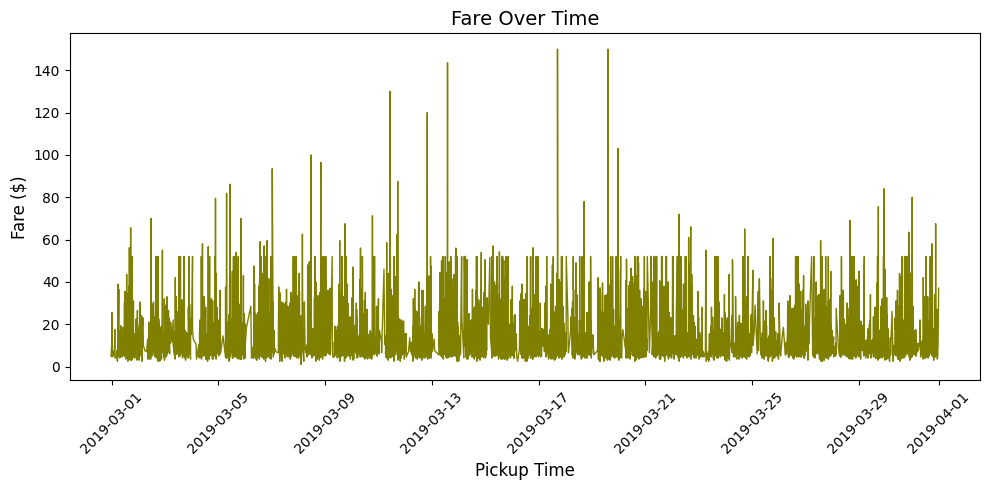

In [62]:
#Line Plot

df['pickup'] = pd.to_datetime(df['pickup'])

# Sort by pickup time to ensure proper line plotting
df = df.sort_values('pickup')
# Create the line chart
plt.figure(figsize=(10, 5))
plt.plot(df['pickup'], df['fare'], color='olive', linewidth=1)
# Add titles and labels
plt.title("Fare Over Time", fontsize=14)
plt.xlabel("Pickup Time", fontsize=12)
plt.ylabel("Fare ($)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

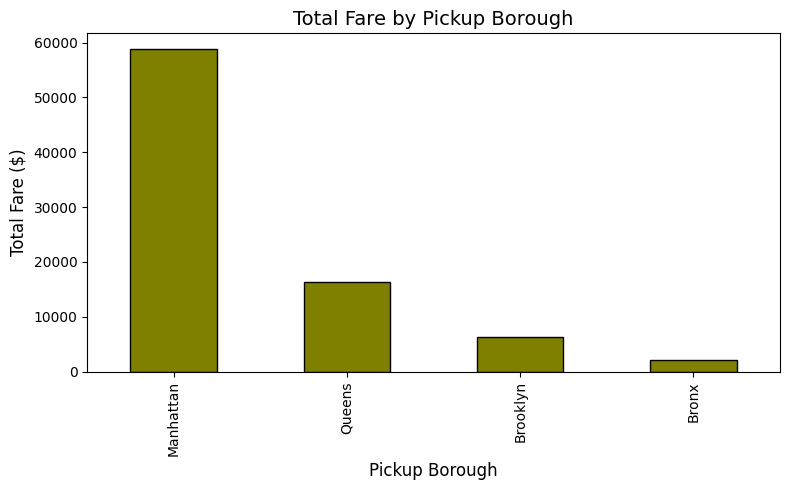

In [64]:
#Bar Chart
# Group by 'pickup_borough' and sum the 'fare'
fare_by_borough = df.groupby('pickup_borough')['fare'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 5))
fare_by_borough.plot(kind='bar', color='olive', edgecolor='black')

# Add titles and labels
plt.title("Total Fare by Pickup Borough", fontsize=14)
plt.xlabel("Pickup Borough", fontsize=12)
plt.ylabel("Total Fare ($)", fontsize=12)

# Display the bar chart
plt.tight_layout()
plt.show()

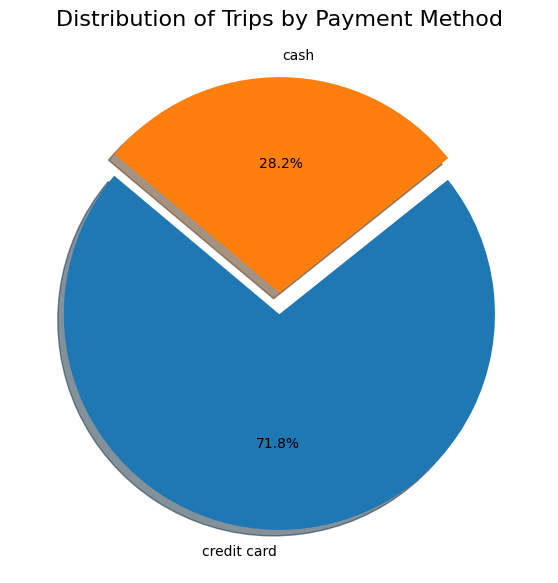

In [67]:
# Count the number of trips per payment method
payment_counts = df['payment'].value_counts()

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(payment_counts,
        labels=payment_counts.index,
        autopct='%1.1f%%',   # show percentages
        startangle=140,      # rotate start
        shadow=True,         # add a slight shadow
        explode=[0.05]*len(payment_counts))  # separate slices slightly

# Add title
plt.title("Distribution of Trips by Payment Method", fontsize=16)

# Display the pie chart
plt.show()

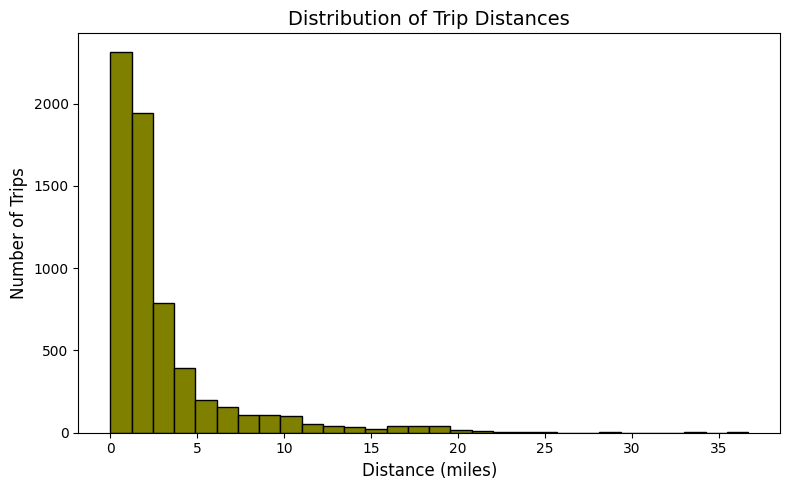

In [69]:
# Histogram for 'distance'
plt.figure(figsize=(8, 5))
plt.hist(df['distance'], bins=30, color='olive', edgecolor='black')

# Add titles and labels
plt.title("Distribution of Trip Distances", fontsize=14)
plt.xlabel("Distance (miles)", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

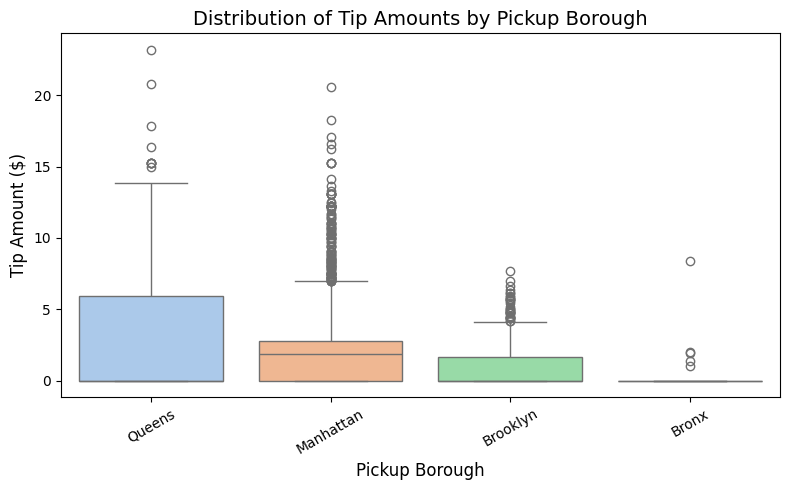

In [72]:
# Box plot (with updated palette usage)
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='pickup_borough',
    y='tip',
    hue='pickup_borough',     # added hue
    data=df,
    palette='pastel',
    legend=False              # disable legend (since hue duplicates x)
)

# Add titles and labels
plt.title("Distribution of Tip Amounts by Pickup Borough", fontsize=14)
plt.xlabel("Pickup Borough", fontsize=12)
plt.ylabel("Tip Amount ($)", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=30)

# Display the plot
plt.tight_layout()
plt.show()

#4.Visualizations using Seaborn:

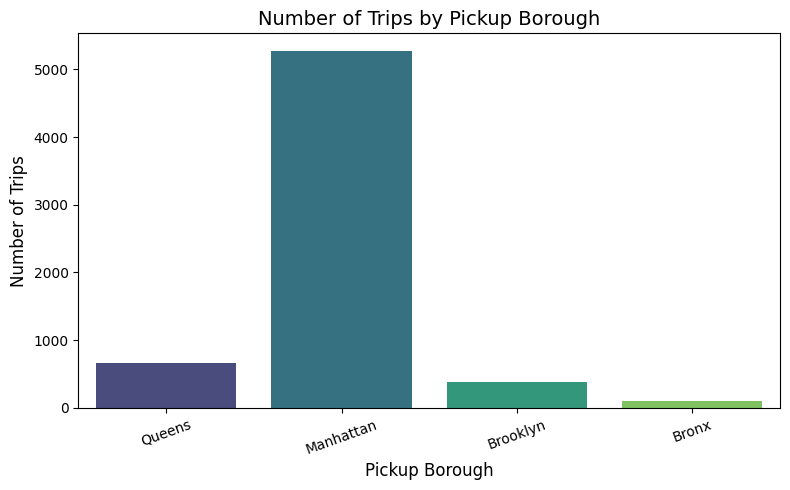

In [73]:
# Count plot for pickup_borough
plt.figure(figsize=(8, 5))
sns.countplot(
    x='pickup_borough',
    data=df,
    hue='pickup_borough',   # add hue (for color, required in newer Seaborn)
    palette='viridis',
    legend=False
)

# Add titles and labels
plt.title("Number of Trips by Pickup Borough", fontsize=14)
plt.xlabel("Pickup Borough", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=20)

# Display the plot
plt.tight_layout()
plt.show()

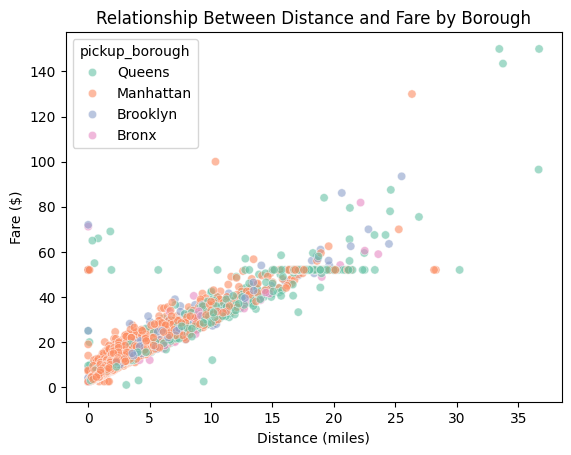

In [74]:
# Scatter plot
sns.scatterplot(
    data=df,
    x="distance",
    y="fare",
    hue="pickup_borough",  # color points by borough
    palette="Set2",        # choose a color palette
    alpha=0.6              # make points slightly transparent for better visibility
)

plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.title("Relationship Between Distance and Fare by Borough")
plt.show()

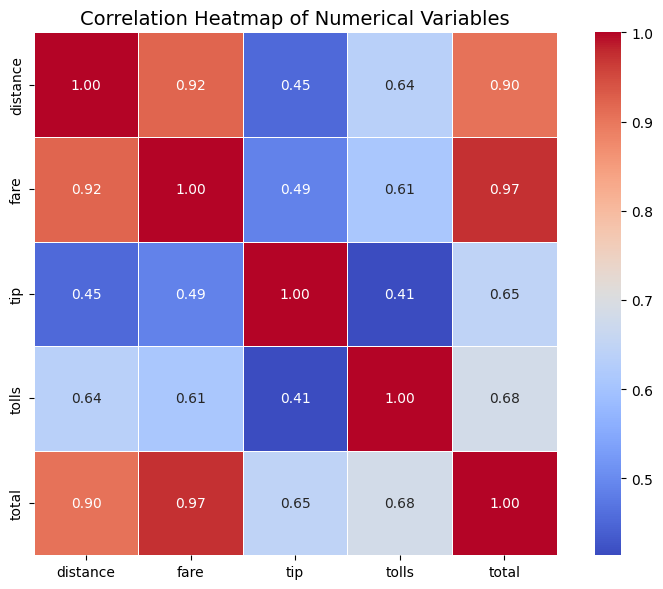

In [75]:
# Select numerical columns for correlation
num_cols = ['distance', 'fare', 'tip', 'tolls', 'total']

# Compute the correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    cmap='coolwarm',     # color palette
    fmt=".2f",           # format to 2 decimal places
    linewidths=0.5,      # space between cells
    square=True
)

# Add title
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

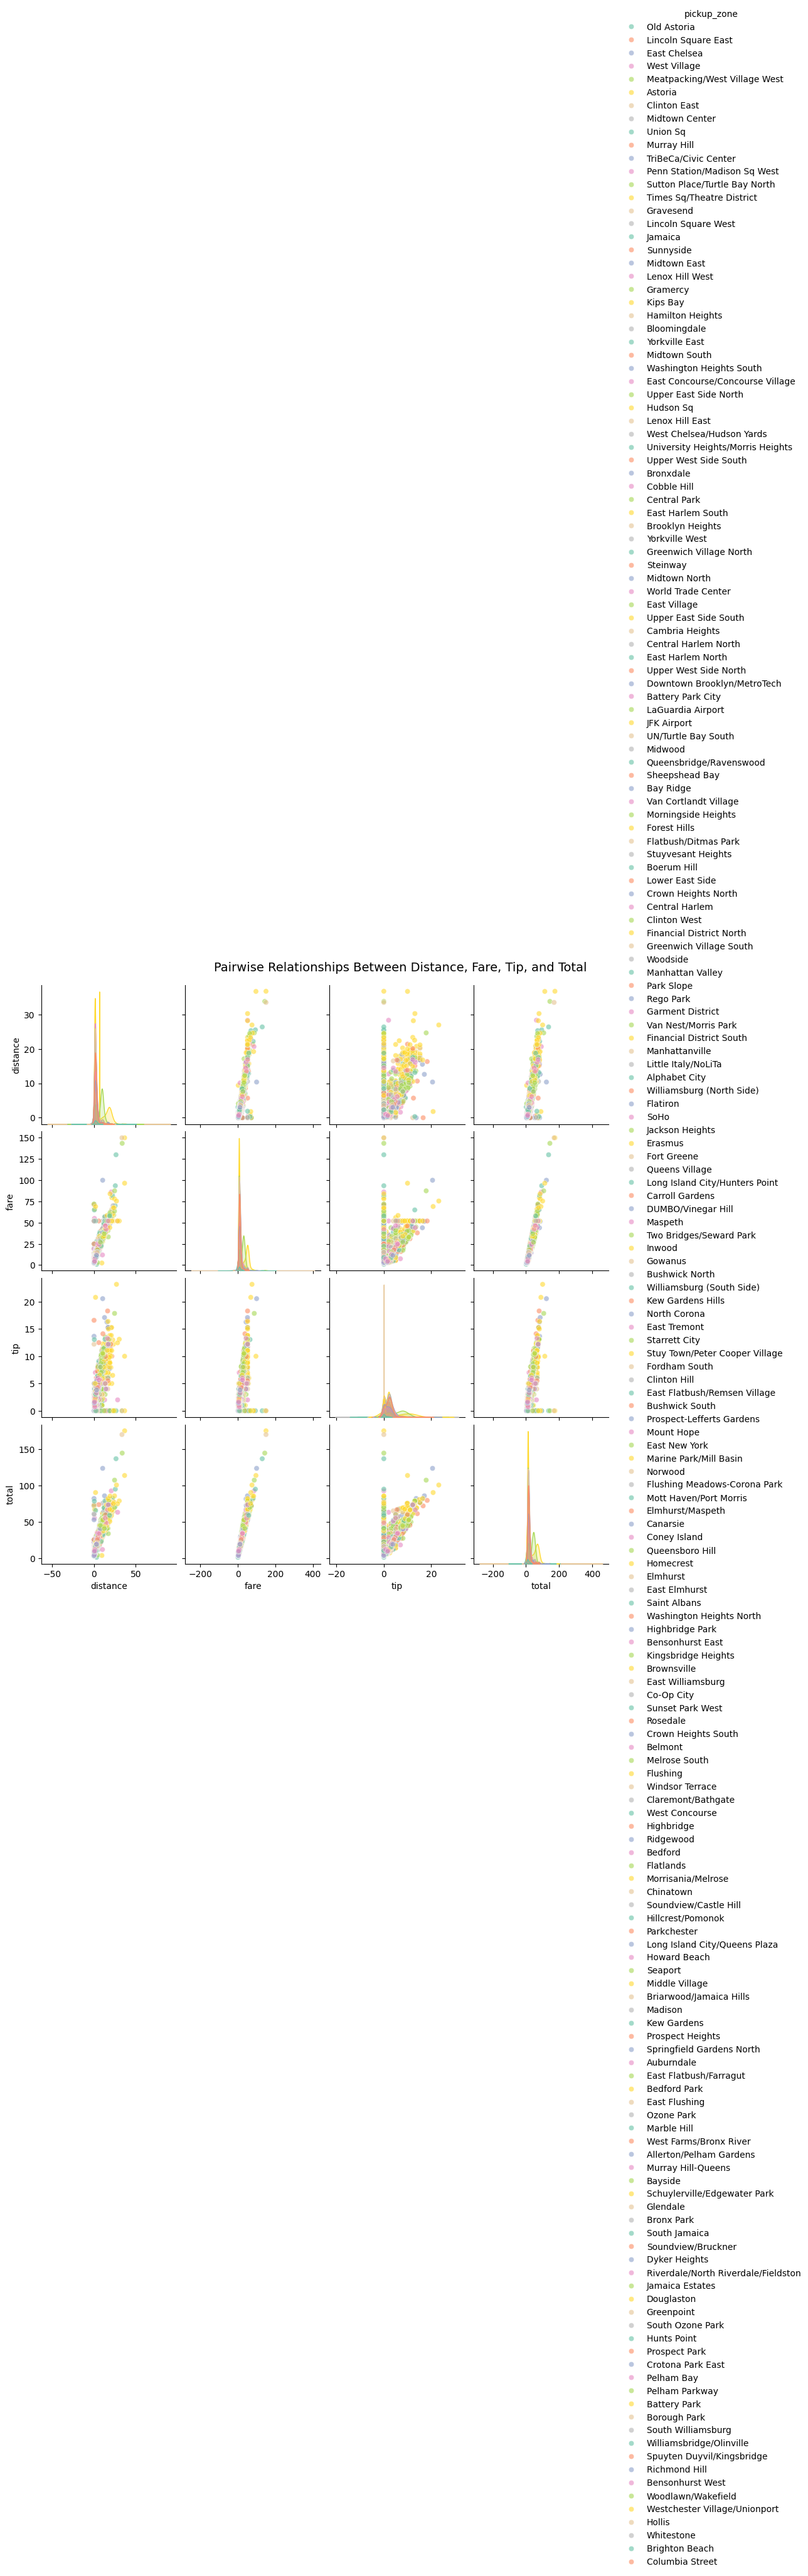

In [76]:
# Pair plot
cols = ['distance', 'fare', 'tip', 'total', 'pickup_zone']

# Create the pair plot
sns.pairplot(
    data=df[cols],
    hue='pickup_zone',       # color by pickup zone
    palette='Set2',          # nice color palette
    diag_kind='kde',         # smooth density on the diagonal
    plot_kws={'alpha': 0.6}  # make points slightly transparent
)

# Add title
plt.suptitle("Pairwise Relationships Between Distance, Fare, Tip, and Total", fontsize=14, y=1.02)

# Show the plot
plt.show()

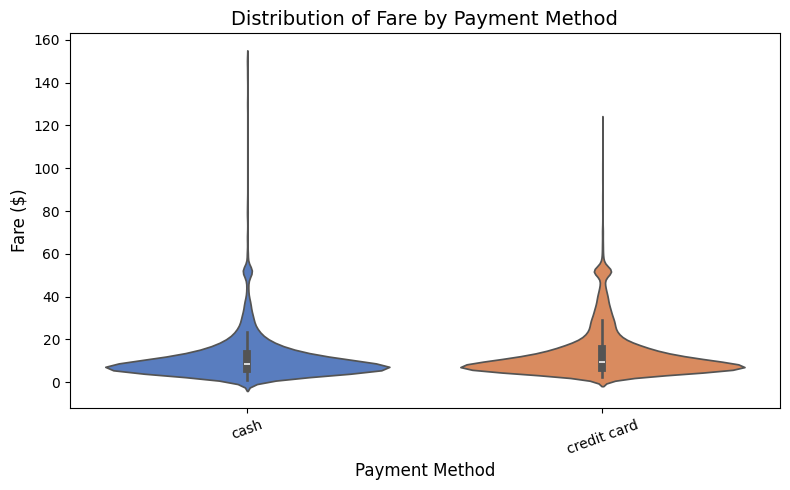

In [77]:
# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(
    x='payment',
    y='fare',
    hue='payment',       # required for newer seaborn versions when using palette
    data=df,
    palette='muted',
    legend=False
)

# Add titles and labels
plt.title("Distribution of Fare by Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Fare ($)", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=20)

# Display the plot
plt.tight_layout()
plt.show()

#End